Dataset loaded successfully.

Model Accuracy: 0.7985

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3294
           1       0.66      0.41      0.50      1097

    accuracy                           0.80      4391
   macro avg       0.74      0.67      0.69      4391
weighted avg       0.78      0.80      0.78      4391



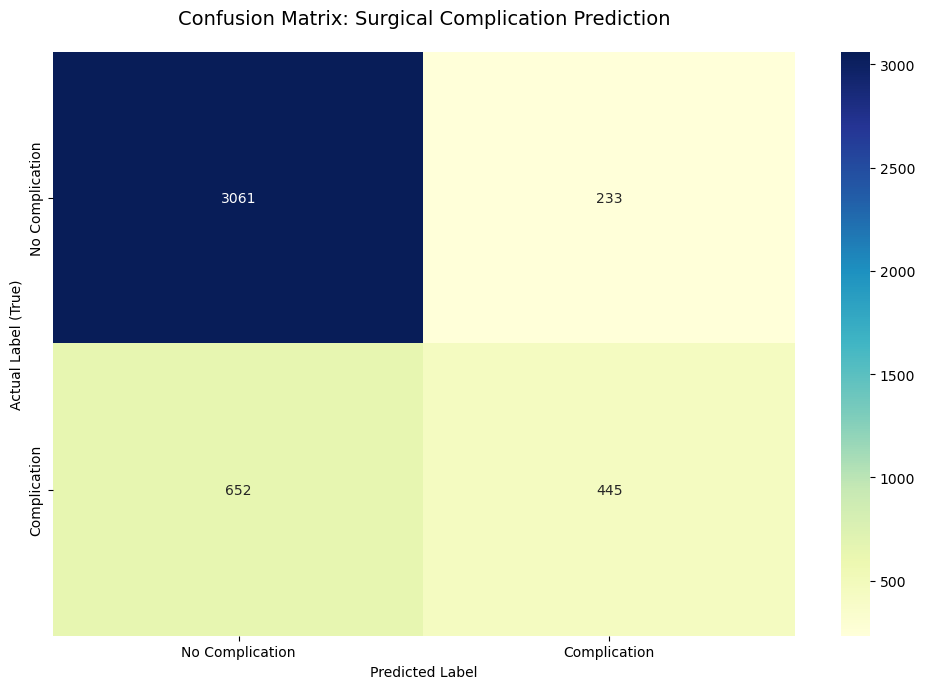

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Data Loading
try:
    # Loading the surgical complications dataset
    data = pd.read_csv("Surgical-deepnet.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Surgical-deepnet.csv' not found. Please ensure the file is in the directory.")

# 2. Preprocessing
# Splitting features (X) and target output (y)
X = data.drop('complication', axis=1)
y = data['complication']

# Label Encoding: Convert categorical target variable into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting data into training and testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardization: Scaling features to have a mean of 0 and variance of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Dimensionality Reduction (PCA)
# Reducing the feature space to 7 principal components
pca = PCA(n_components=7) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 4. Model Training (Random Forest)
# Initializing and training the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_pca, y_train)

# 5. Prediction and Evaluation
y_pred = rf.predict(X_test_pca)

# Calculating and printing performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", 
            xticklabels=['No Complication', 'Complication'], 
            yticklabels=['No Complication', 'Complication'])

plt.title('Confusion Matrix: Surgical Complication Prediction', fontsize=14, pad=20)
plt.ylabel('Actual Label (True)')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()